In [1]:
%load_ext autoreload

# --------------- #
# region: Imports #
import os
import sys
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
  sys.path.insert(0, module_path)
# endregion   #
# --------------- #

In [2]:
from examples.cleanup.env import Cleanup
from examples.cleanup.agents import Agent
from examples.RPG.utils import load_config
from gem.models.human_player import ModelHumanPlayer
from gem.utils import visual_field, visual_field_multilayer

from IPython.display import clear_output

import argparse
import matplotlib.pyplot as plt
import random

cfg = load_config(argparse.Namespace(config='../configs/config.yaml'))

N_AGENTS = 3
agents = []
for i in range(N_AGENTS):
  agents.append(
  Agent(cfg, appearance = cfg.agent.agent.appearance, model = ModelHumanPlayer(6, state_size=[
  cfg.env.channels, cfg.env.height, cfg.env.width
  ], memory_size=1))
  )

env = Cleanup(
  cfg, agents
)

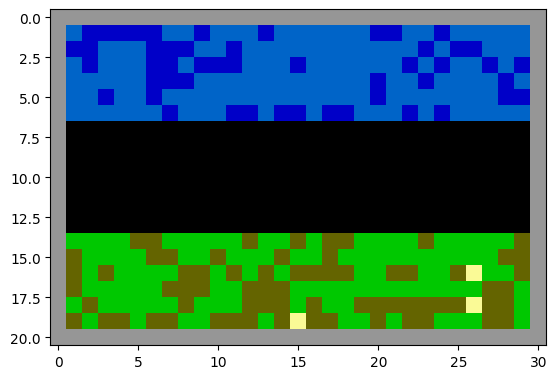

torch.Size([1, 1, 8, 21, 31])
(8, 21, 31)
Please try again. Possible actions are below.
[0 1 2 3 4 5]


UnboundLocalError: cannot access local variable 'action' where it is not associated with a value

In [3]:
for epoch in range(cfg.experiment.epochs):
    # Reset the environment at the start of each epoch
        for agent in env.agents:
            agent.reset()
        random.shuffle(agents)

        done = 0 
        turn = 0
        losses = 0
        game_points = 0

        while not done:

            turn = turn + 1

            entities = env.get_entities_for_transition()
            print(entities)
            # Entity transition
            for entity in entities:
                entity.transition(env)

            # Agent transition
            for agent in agents:
                
                img = visual_field_multilayer(env.world, env.color_map, channels=8, return_rgb=True)
                clear_output(wait = True)
                plt.imshow(img.astype(int))
                plt.show()

                (state,
                action,
                reward,
                next_state,
                done_
                ) = agent.transition(env)

                if turn >= cfg.experiment.max_turns or done_:
                    done = 1

                exp = (1, (state, action, reward, next_state, done))
                agent.episode_memory.append(exp)

                game_points += reward
